**SVD DEFINITION**

Examples for SVD definition:

In [1]:
import numpy as np

A = np.array([[3,2],[2,3],[2,-2]])
print('-----Matrix A-------')
print(A)

print('-----SVD: U, D, Vt-------')
[U,D,Vt] = np.linalg.svd(A, full_matrices=True)
print(U)
print(D)
print(Vt)

-----Matrix A-------
[[ 3  2]
 [ 2  3]
 [ 2 -2]]
-----SVD: U, D, Vt-------
[[-7.07106781e-01  2.35702260e-01 -6.66666667e-01]
 [-7.07106781e-01 -2.35702260e-01  6.66666667e-01]
 [-1.66533454e-16  9.42809042e-01  3.33333333e-01]]
[5. 3.]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [17]:
print("-----U'.U and U.U'------")
print(np.matrix.round(U.T.dot(U))) #matrix.round: avoid NumPy's imprecision
print(np.matrix.round(U.dot(U.T)))

print("-----Vt'.Vt and Vt.Vt'------")
print(np.matrix.round(Vt.T.dot(Vt)))
print(np.matrix.round(Vt.dot(Vt.T)))

print('----u characteristics---------')
print(U[:,0].dot(U[:,0])) # U's columns are unit vectors
print(U[:,0].dot(U[:,1])) # U's columns are orthogonal to each other

-----U'.U and U.U'------
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]
-----Vt'.Vt and Vt.Vt'------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]
----u characteristics---------
1.0
1.1102230246251565e-16


In [7]:
A = np.array([[3,2,2],[2,3,-2]])
print('-----Matrix A-------')
print(A)

print('-----SVD: U, D, Vt-------')
[U,D,Vt] = np.linalg.svd(A, full_matrices=True)
print(U)
print(D)
print(Vt)

-----Matrix A-------
[[ 3  2  2]
 [ 2  3 -2]]
-----SVD: U, D, Vt-------
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[5. 3.]
[[-7.07106781e-01 -7.07106781e-01 -5.55111512e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


Examples of Thin SVD:

In [20]:
A = np.array([[3,2],[2,3],[2,-2]])
print('-----Matrix A-------')
print(A)

print('-----SVD: U, D, Vt-------')
[U,D,Vt] = np.linalg.svd(A, full_matrices=False)
print(U)
print(D)
print(Vt)

-----Matrix A-------
[[ 3  2]
 [ 2  3]
 [ 2 -2]]
-----SVD: U, D, Vt-------
[[-7.07106781e-01  2.35702260e-01]
 [-7.07106781e-01 -2.35702260e-01]
 [-1.66533454e-16  9.42809042e-01]]
[5. 3.]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


Example of Compact SVD:

In [43]:
A = np.array([[3, 2, 4], [-1, 1, 2], [9, 5, 10]])
print('-----A matrix of rank 2 (not full rank)-------')
print(A)
[U,D,Vt] = np.linalg.svd(A, full_matrices=False)
print('-----SVD: U, D, Vt-------')
print(np.matrix.round(U,2))
print(np.matrix.round(D,2))
print(np.matrix.round(Vt,2))
print('-----Compact SVD: Ur, Dr, Vtr-------')
Ur = U[:,:2]
Dr = D[:2]
Vtr = Vt[:2,:]
print(Ur.dot(np.diag(Dr).dot(Vtr)))

-----A matrix of rank 2 (not full rank)-------
[[ 3  2  4]
 [-1  1  2]
 [ 9  5 10]]
-----SVD: U, D, Vt-------
[[-0.35 -0.16 -0.92]
 [-0.08 -0.98  0.2 ]
 [-0.93  0.14  0.33]]
[15.37  2.21  0.  ]
[[-0.61 -0.35 -0.71]
 [ 0.79 -0.27 -0.55]
 [ 0.   -0.89  0.45]]
-----Compact SVD: Ur, Dr, Vtr-------
[[ 3.  2.  4.]
 [-1.  1.  2.]
 [ 9.  5. 10.]]


**SVD APPLICATIONS**

Pseudo-Inverse Matrix

In [16]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, Vt = np.linalg.svd(A, full_matrices=True)

# Pseudoinverse calculation
D_plus = np.zeros(A.shape)
# The following line assumes that there are no zero values 
# in D for quick calculation
D_plus[:D.shape[0],:D.shape[0]] = np.diag(1/D)
D_plus = D_plus.T
A_plus = Vt.T.dot(D_plus.dot(U.T))

print("--------Pseudoinverse by SVD------")
print(A_plus)
print("--------Pseudoinverse by NumPy's pinv method------")
print(np.linalg.pinv(A))

--------Pseudoinverse by SVD------
[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]
--------Pseudoinverse by NumPy's pinv method------
[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]


A linear regression problem

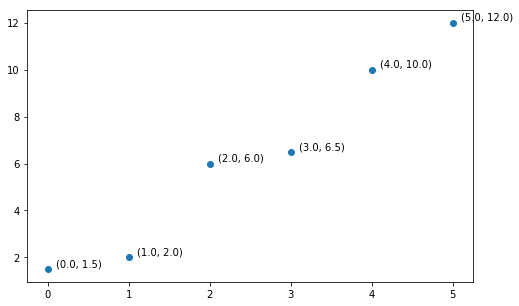

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

dataset = np.array([[0, 1.5], [1, 2], [2, 6], [3, 6.5], [4, 10], [5, 12]])

plt.rcParams["figure.figsize"] = [8,5]
plt.scatter(dataset[:, 0], dataset[:, 1])
for i in np.arange(dataset.shape[0]):
    plt.annotate('('+str(dataset[i][0]) + ', ' + str(dataset[i][1]) + ')', 
                 (dataset[:,0][i]+0.1, dataset[:,1][i]+0.1))
plt.show()

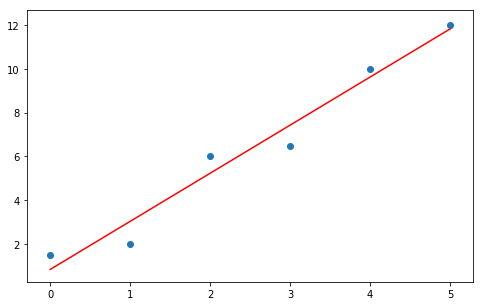

In [75]:
# Construct matrix A and vector b
A = dataset.copy()
A[:,1] = 1
b = dataset[:,1]

# Calculate A_plus
A_plus = np.linalg.pinv(A)

# Calculate vector x
x = A_plus.dot(b)

# Plot the line
lon = np.linspace(0,5,100)
lat = x[0]*lon + x[1]
plt.plot(lon, lat, '-r')
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

In [78]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, Vt = np.linalg.svd(A, full_matrices=False)

print('-----SVD: U, D, Vt-------')
print(U)
print(D)
print(Vt)

# Pseudoinverse calculation
D_plus = np.zeros(Vt.shape)
# The following line assumes that there are no zero values 
# in D for quick calculation
D_plus[:D.shape[0],:D.shape[0]] = np.diag(1/D)
D_plus = D_plus.T
A_plus = Vt.T.dot(D_plus.dot(U.T))

print("--------Pseudoinverse by SVD------")
print(A_plus)
print("--------Pseudoinverse by NumPy's pinv method------")
print(np.linalg.pinv(A))

-----SVD: U, D, Vt-------
[[-0.69366543  0.59343205]
 [-0.4427092  -0.79833696]
 [-0.56818732 -0.10245245]]
[10.25142677  2.62835484]
[[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]
--------Pseudoinverse by SVD------
[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]
--------Pseudoinverse by NumPy's pinv method------
[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]
